<a href="https://colab.research.google.com/github/Gabriellemga/Praticando_Python/blob/main/Praticando_Pandas_criando_tabula%C3%A7%C3%B5es_com_groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1 - Analisando vendas em uma rede de lojas

Você está analisando dados de vendas em uma rede de lojas de departamentos e foi encarregado(a) de responder a algumas perguntas de negócio críticas para o planejamento estratégico da empresa. A primeira questão essencial é entender o desempenho das três unidades da rede, especificamente no que se refere ao valor total de vendas para o período.

O objetivo é obter a soma do valor total das vendas por unidade para identificar qual está performando melhor em termos de geração de receita. Essa análise ajudará a liderança a tomar decisões informadas sobre possíveis investimentos, promoções e realocação de recursos.

Sua missão nesta atividade é carregar os dados de vendas, examinar as informações disponíveis, e aplicar o método groupby() para agrupar e sumarizar o valor total de vendas por unidade.

Os dados estão disponíveis na seguinte url: https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/loja_vendas.csv

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/loja_vendas.csv'

In [ ]:
dados_vendas = pd.read_csv(url)

In [ ]:
dados_vendas.head()

,ID_compra,unidade,cidade,data,horario,categoria_produto,valor_unitario,quantidade,valor_total,metodo_pagamento,ID_cliente,programa_cashback,idade,avaliacao_compra
0,6,Parque das nações,Santo André,2022-01-03,15:40,Eletrônicos,4457.9,4,17831.6,Dinheiro,6149,Sim,30,10
1,5,Oswaldo Cruz,São Caetano do Sul,2022-01-03,16:48,Ferramentas e construção,115.9,1,115.9,PIX,9491,Sim,36,9
2,9,Paulicéia,São Bernardo do Campo,2022-01-03,12:08,Beleza e cuidados pessoais,68.9,2,137.8,Cartão,5288,Não,39,9
3,4,Oswaldo Cruz,São Caetano do Sul,2022-01-03,9:29,Ferramentas e construção,80.9,5,404.5,PIX,9679,Sim,35,10
4,8,Parque das nações,Santo André,2022-01-03,13:02,Beleza e cuidados pessoais,165.0,4,660.0,PIX,1380,Não,50,9


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_compra          6169 non-null   int64  
 1   unidade            6169 non-null   object 
 2   cidade             6169 non-null   object 
 3   data               6169 non-null   object 
 4   horario            6169 non-null   object 
 5   categoria_produto  6169 non-null   object 
 6   valor_unitario     6169 non-null   float64
 7   quantidade         6169 non-null   int64  
 8   valor_total        6169 non-null   float64
 9   metodo_pagamento   6169 non-null   object 
 10  ID_cliente         6169 non-null   int64  
 11  programa_cashback  6169 non-null   object 
 12  idade              6169 non-null   int64  
 13  avaliacao_compra   6169 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 674.9+ KB


In [ ]:
valor_total_vendas = dados_vendas.groupby('unidade')[['valor_total']].sum()
valor_total_vendas

,valor_total
unidade,
Oswaldo Cruz,5811213.0
Parque das nações,5443778.1
Paulicéia,4988462.9


# Desafio 2 - Analisando as vendas por categoria de produto

Depois de avaliar o desempenho das unidades individuais da rede, a próxima tarefa é analisar o desempenho de vendas por categoria de produto. Esta análise é crucial para identificar quais categorias estão contribuindo mais significativamente para as receitas e podem ser alvos de estratégias de marketing ou ajustes de estoque.

Sua missão nesta atividade é aplicar o método groupby() para agrupar e sumarizar o valor total de vendas por categoria de produto. Para tornar os resultados ainda mais claros, ordene as categorias de acordo com o valor total de vendas, do maior para o menor.

In [ ]:
vendas_por_produto = dados_vendas.groupby('categoria_produto')[['valor_total']].sum().sort_values('valor_total', ascending = False)
vendas_por_produto

,valor_total
categoria_produto,
Eletrônicos,14898778.5
Beleza e cuidados pessoais,423262.9
Casa e limpeza,316688.6
Ferramentas e construção,252953.1
Alimentos e bebidas,231284.3
Livros,75265.0
Papelaria e escritório,45221.6


# Desafio 3 - Analisando a idade dos clientes por método de pagamento

Após analisar o desempenho das vendas por categoria de produto, agora focaremos em entender como diferentes métodos de pagamento estão associados a diferentes faixas etárias dos compradores. Esta análise é vital para identificar preferências de pagamento de acordo com a idade, o que pode orientar a implementação de estratégias de marketing mais eficazes e aprimorar a experiência de compra.

Sua missão nesta atividade é aplicar o método groupby() para agrupar os compradores por método de pagamento e calcular os valores mínimos, médios e máximos da idade dos compradores para cada método.

In [ ]:
dados_vendas['metodo_pagamento'].unique(),dados_vendas['idade'].unique()

(array(['Dinheiro', 'PIX', 'Cartão', 'Carteira digital'], dtype=object),
 array([30, 36, 39, 35, 50, 45, 43, 32, 46, 26, 18, 40, 23, 48, 56, 51, 34,
        33, 28, 47, 22, 44, 37, 49, 41, 27, 38, 25, 42, 57, 55, 31, 52, 24,
        19, 54, 29, 21, 58, 60, 53, 20, 62, 59, 61, 68, 63, 70, 65, 64, 66,
        67, 69]))

In [ ]:
pagamento_por_idade = dados_vendas.groupby('metodo_pagamento')['idade'].agg(['min','mean', 'max']).round()
pagamento_por_idade

,min,mean,max
metodo_pagamento,,,
Carteira digital,18,28.0,60
Cartão,18,38.0,65
Dinheiro,18,46.0,70
PIX,18,40.0,68


# Desafio 4 - Analisando valores de aluguel por região

Nesta atividade, vamos explorar outro dataset que contém informações sobre o preço de aluguel de apartamentos na cidade de São Paulo. Este conjunto de dados nos permitirá entender as variações de preços nas diferentes regiões da cidade.
Sua missão nesta atividade é aplicar o método groupby() para agrupar os dados por região e utilizar o método describe() para obter estatísticas descritivas do valor do aluguel. As estatísticas descritivas fornecerão insights importantes como média, mediana, valor mínimo, máximo e quartis, oferecendo uma visão detalhada sobre a distribuição dos preços de aluguel em cada região.

Os dados estão disponíveis na seguinte url:https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv'

In [ ]:
dados = pd.read_csv(url)
dados.head()

,Quartos,Banheiros,Suites,Vagas,Elevador,Mobiliado,Piscina,Regiao,Ano,Valor
0,2,2,1,1,Nao,Nao,Sim,Centro,2015,2500
1,1,2,1,2,Sim,Sim,Sim,Centro,2019,5000
2,1,2,1,1,Sim,Sim,Nao,Centro,2007,1600
3,2,2,1,1,Nao,Nao,Nao,Centro,2008,1500
4,3,3,1,1,Sim,Nao,Nao,Centro,2009,2200


In [ ]:
dados_por_região = dados.groupby('Regiao')[['Valor']].describe()
dados_por_região

Valor                                                            \
         count         mean          std    min     25%     50%      75%   
Regiao                                                                     
Centro   882.0  3001.555556  1524.744855  630.0  1650.0  2500.0  4278.75   
Leste   1918.0  1697.117310   829.727960  480.0  1100.0  1450.0  2000.00   
Norte   1264.0  1994.897152  1011.112411  500.0  1250.0  1600.0  2500.00   
Oeste   1779.0  3590.162451  2058.407711  800.0  2000.0  3000.0  4700.00   
Sul     1809.0  2976.616363  1716.671558  700.0  1600.0  2500.0  4000.00   

                 
            max  
Regiao           
Centro   7000.0  
Leste    5025.0  
Norte    5652.0  
Oeste   10100.0  
Sul      7800.0

# Desafio 5 - Analisando como a localização e a existência de piscinas afetam os valores de aluguel

Após explorar as estatísticas descritivas dos valores de aluguel por região, nosso próximo passo é entender como a ausência/presença de uma piscina no prédio influencia o preço de aluguel em diferentes regiões de São Paulo. Esta análise ajudará a entender melhor as preferências do mercado e poderá ser usada para orientar estratégias de precificação e marketing.

Agrupe os dados por região e piscina e calcule a média dos preços de aluguel. Esta abordagem mostrará como as piscinas afetam os preços de aluguel em diferentes áreas da cidade.

In [ ]:
regiao_piscina = dados.groupby(['Regiao', 'Piscina'])['Valor'].mean().unstack()
regiao_piscina

Piscina,Nao,Sim
Regiao,,
Centro,2723.148900,3566.979381
Leste,1528.108367,2017.036199
Norte,1780.965217,2252.062718
Oeste,3261.135101,3854.184397
Sul,2549.529851,3318.285572


# Desafio 6 - Reorganizando os dados do valor de aluguel

Nesta atividade você vai praticar como reformatar o resultado com o método unstack(), que transforma os dados de uma estrutura indexada por múltiplos níveis em uma forma tabular mais legível e prática para análise.

Utilize o método unstack() para transformar o índice múltiplo de região e piscina numa tabela onde cada região aparece como uma linha e as colunas se dividem em Piscina "Nao" e "Sim”, mostrando a média dos valores de aluguel. Isso facilitará a visualização direta das diferenças de preço entre apartamentos com e sem piscina em cada região.

In [ ]:
regiao_piscina = dados.groupby(['Regiao', 'Piscina'])['Valor'].mean().unstack()
regiao_piscina

# Desafio 7 - Analisando a tendência anual do valor de aluguel

Após examinar como características específicas dos imóveis influenciam os preços de aluguel em diferentes regiões, vamos agora focar em uma perspectiva temporal, considerando o ano de construção dos imóveis. O objetivo é compreender como a idade das construções influencia os preços de aluguel.

Agrupe os dados pelo ano do imóvel e calcule a média do valor de aluguel para cada ano. Isso permitirá que você visualize a variação dos preços de aluguel ao longo do tempo e identifique padrões de aumento, estabilidade ou diminuição.

Para simplificar a análise, você pode criar um gráfico de linhas diretamente com a biblioteca Pandas. Basta utilizar o método plot(kind='line') na variável que contém os dados agrupados, e o gráfico será gerado automaticamente."

In [ ]:
ano_aluguel = dados.groupby('Ano')['Valor'].mean()
ano_aluguel

,Valor
Ano,
1998,955.798701
1999,1059.437229
2000,1110.494662
2001,1167.624224
2002,1267.341463
2003,1364.223368
2004,1443.289157
2005,1545.721854
2006,1594.024242


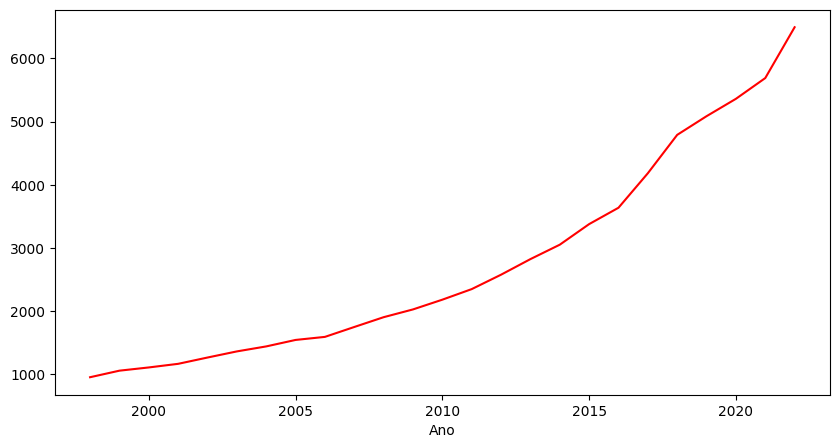

In [ ]:
ano_aluguel.plot(kind = 'line', figsize = (10,5), color = 'red');

# Desafio 8 - Analisando dados de saúde sobre doença cardíaca

Nesta atividade, vamos explorar um conjunto de dados que contém informações sobre pacientes que foram diagnosticados com ou sem doença cardíaca. Temos dados demográficos e informações de alguns exames médicos.

O primeiro desafio com esses dados será agrupá-los com base na presença/ausência de doença cardíaca e sexo biológico, e calcular as idades mínima, média e máxima para cada grupo. Esta análise ajudará a identificar se há padrões visíveis que associam idade e sexo biológico à prevalência de doença cardíaca nestes dados.

Utilize a seguinte URL para carregar o conjunto de dados em um DataFrame:https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/pacientes_doenca_cardiaca.csv

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/pacientes_doenca_cardiaca.csv'

In [ ]:
dados_saude = pd.read_csv(url)
dados_saude.head()

,Idade,Sexo_biologico,Tipo_dor,Pressao_arterial,Colesterol,Glicemia_jejum>120,Resultados_ECG,Frequencia_cardiaca_max,Dor_exercicio,Depressao_ST,Inclinacao_ST,Numero_vasos_fluro,Teste_cintilografia,Doenca_cardiaca
0,70,Masculino,assintomática,130,322,Não,2,109,Não,2.4,2,3,3,Sim
1,67,Feminino,dor não anginosa,115,564,Não,2,160,Não,1.6,2,0,7,Não
2,57,Masculino,angina atípica,124,261,Não,0,141,Não,0.3,1,0,7,Sim
3,64,Masculino,assintomática,128,263,Não,0,105,Sim,0.2,2,1,7,Não
4,74,Feminino,angina atípica,120,269,Não,2,121,Sim,0.2,1,1,3,Não


In [ ]:
cardiaco_idade = dados_saude.groupby(['Doenca_cardiaca','Sexo_biologico'])['Idade'].agg(['min', 'mean', 'max']).round()
cardiaco_idade

min  mean  max
Doenca_cardiaca Sexo_biologico                
Não             Feminino         34  55.0   76
                Masculino        29  51.0   70
Sim             Feminino         43  59.0   66
                Masculino        35  56.0   77

# Desafio 9  - Analisando exames específicos

Nesta atividade, vamos aprofundar a análise do impacto da doença cardíaca em diferentes tipos de dor no peito, correlacionando-os com o nível de depressão ST, um indicador comum usado em exames cardíacos. Este tipo de análise é crucial para entender como a doença cardíaca pode influenciar outros sintomas e resultados de exames.

Agrupe os dados pela presença de doença cardíaca e tipo de dor no peito, e calcule a média do exame Depressão_ST para cada grupo. Utilize o método unstack() para transformar os dados agrupados em uma tabela mais legível, facilitando a comparação entre os diferentes grupos.

In [ ]:
cardiaco_dor = dados_saude.groupby(['Doenca_cardiaca', 'Tipo_dor'])['Depressao_ST'].mean().unstack()
cardiaco_dor

Tipo_dor,angina atípica,angina típica,assintomática,dor não anginosa
Doenca_cardiaca,,,,
Não,0.277143,1.426667,0.581579,0.648387
Sim,0.642857,1.600000,1.639560,1.670588


# Desafio 10 - Analisando indicadores clínicos com múltiplas agregações

Por fim, vamos finalizar as atividades focando em uma análise detalhada de vários indicadores clínicos dos pacientes, agrupados por presença de doença cardíaca e sexo biológico. Exploraremos as médias de várias informações. Este exercício é fundamental para entender esses fatores em diferentes grupos.

Agrupe os dados por doença cardíaca e sexo biológico e aplique várias funções de agregação para calcular as médias das seguintes variáveis: idade, pressão arterial, colesterol, frequência cardíaca máxima, Depressão ST, Inclinação ST e número de vasos detectados por fluoroscopia.

Renomeie as colunas resultantes para indicar que contêm as médias das variáveis.

In [ ]:
indicadores = ['Idade', 'Pressao_arterial', 'Colesterol', 'Frequencia_cardiaca_max', 'Depressao_ST', 'Inclinacao_ST',	'Numero_vasos_fluro']

In [ ]:
indicadores_clinicos = dados_saude.groupby(['Doenca_cardiaca','Sexo_biologico'])[indicadores].mean()
indicadores_clinicos

Idade  Pressao_arterial  Colesterol  \
Doenca_cardiaca Sexo_biologico                                            
Não             Feminino        54.582090        128.283582  257.208955   
                Masculino       51.192771        129.337349  233.722892   
Sim             Feminino        59.350000        148.650000  290.000000   
                Masculino       56.040000        131.600000  249.760000   

                                Frequencia_cardiaca_max  Depressao_ST  \
Doenca_cardiaca Sexo_biologico                                          
Não             Feminino                     154.835821      0.568657   
                Masculino                    161.156627      0.666265   
Sim             Feminino                     143.500000      1.960000   
                Masculino                    137.930000      1.509000   

                                Inclinacao_ST  Numero_vasos_fluro  
Doenca_cardiaca Sexo_biologico                                     
Não             Feminino             1.402985            0.313433  
                Masculino            1.397590            0.265060  
Sim             Feminino             2.000000            1.350000  
                Masculino            1.780000            1.110000

In [ ]:
indicadores_clinicos = indicadores_clinicos.rename(columns={
    'Idade': 'Media_Idade',
    'Pressao_arterial': 'Media_Pressao_arterial',
    'Colesterol': 'Media_Colesterol',
    'Frequencia_cardiaca_max': 'Media_Frequencia_cardiaca_max',
    'Depressao_ST': 'Media_Depressao_ST',
    'Inclinacao_ST': 'Media_Inclinacao_ST',
    'Numero_vasos_fluro': 'Media_Numero_vasos_fluro'
})

indicadores_clinicos

Media_Idade  Media_Pressao_arterial  \
Doenca_cardiaca Sexo_biologico                                        
Não             Feminino          54.582090              128.283582   
                Masculino         51.192771              129.337349   
Sim             Feminino          59.350000              148.650000   
                Masculino         56.040000              131.600000   

                                Media_Colesterol  \
Doenca_cardiaca Sexo_biologico                     
Não             Feminino              257.208955   
                Masculino             233.722892   
Sim             Feminino              290.000000   
                Masculino             249.760000   

                                Media_Frequencia_cardiaca_max  \
Doenca_cardiaca Sexo_biologico                                  
Não             Feminino                           154.835821   
                Masculino                          161.156627   
Sim             Feminino                           143.500000   
                Masculino                          137.930000   

                                Media_Depressao_ST  Media_Inclinacao_ST  \
Doenca_cardiaca Sexo_biologico                                            
Não             Feminino                  0.568657             1.402985   
                Masculino                 0.666265             1.397590   
Sim             Feminino                  1.960000             2.000000   
                Masculino                 1.509000             1.780000   

                                Media_Numero_vasos_fluro  
Doenca_cardiaca Sexo_biologico                            
Não             Feminino                        0.313433  
                Masculino                       0.265060  
Sim             Feminino                        1.350000  
                Masculino                       1.110000